In [1]:
%%time
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'D:\\aligned_images_DB_dataset\\train'
validation_dir = 'D:\\aligned_images_DB_dataset\\validation'

train_generator = train_datagen.flow_from_directory(
        directory = train_dir,
        target_size=(152, 152),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
        directory = validation_dir,
        target_size=(152, 152),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

Found 470543 images belonging to 1595 classes.
Found 119313 images belonging to 1595 classes.
Wall time: 17.6 s


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import class_weight

base_model = keras.applications.InceptionResNetV2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(152, 152, 3),
    include_top=False)

base_model.trainable = False
    
inputs = keras.Input(shape=(152, 152, 3))
x = base_model(inputs, training=False)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(4096, kernel_regularizer=keras.regularizers.l2(0.001), activation = 'relu')(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(1595, activation = 'softmax')(x) 

model = keras.Model(inputs, outputs)

train_class_weights = {key: value for (key, value) in enumerate(class_weight.compute_class_weight(
               'balanced',
                np.unique(train_generator.classes), 
                train_generator.classes))}

#print(train_class_weights)

validation_class_weights = {key: value for (key, value) in enumerate(class_weight.compute_class_weight(
               'balanced',
                np.unique(validation_generator.classes), 
                validation_generator.classes))}

#print(validation_class_weights)

#from_logits=True
#loss=keras.losses.CategoricalCrossentropy(),
#optimizer=keras.optimizers.RMSprop(),
#metrics=[keras.metrics.CategoricalAccuracy()]
model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

training_history = model.fit(train_generator, 
                             steps_per_epoch=50,
                             epochs=200, 
                             batch_size=32, 
                             class_weight=train_class_weights, 
                             validation_data=validation_generator)

c:\users\steve\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[   0    1    2 ... 1592 1593 1594], y=[   0    0    0 ... 1594 1594 1594] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/200
50/50 [==============================] - 4246s 86s/step - loss: 15.9016 - acc: 0.0119 - val_loss: 13.3737 - val_acc: 0.0215
Epoch 2/200
50/50 [==============================] - 480s 10s/step - loss: 13.2690 - acc: 0.0237 - val_loss: 12.6549 - val_acc: 0.0306
Epoch 3/200
50/50 [==============================] - 1250s 25s/step - loss: 12.9406 - acc: 0.0362 - val_loss: 12.3290 - val_acc: 0.0407
Epoch 4/200
50/50 [==============================] - 641s 13s/step - loss: 12.7244 - acc: 0.0475 - val_loss: 12.0441 - val_acc: 0.0404
Epoch 5/200
50/50 [==============================] - 394s 8s/step - loss: 12.3104 - acc: 0.0531 - val_loss: 11.8470 - val_acc: 0.0581
Epoch 6/200
50/50 [==============================] - 383s 8s/step - loss: 12.3935 - acc: 0.0469 - val_loss: 11.4980 - val_acc: 0.0647
Epoch 7/200
50/50 [==============================] -

50/50 [==============================] - 357s 7s/step - loss: 1.2228 - acc: 0.8675 - val_loss: 1.3726 - val_acc: 0.8564
Epoch 121/200
50/50 [==============================] - 356s 7s/step - loss: 1.1510 - acc: 0.8700 - val_loss: 1.3484 - val_acc: 0.8588
Epoch 122/200
50/50 [==============================] - 355s 7s/step - loss: 1.5537 - acc: 0.8375 - val_loss: 1.5144 - val_acc: 0.8205
Epoch 123/200
50/50 [==============================] - 356s 7s/step - loss: 1.2952 - acc: 0.8300 - val_loss: 1.3794 - val_acc: 0.8503
Epoch 124/200
50/50 [==============================] - 355s 7s/step - loss: 1.1887 - acc: 0.8637 - val_loss: 1.3699 - val_acc: 0.8516
Epoch 125/200
50/50 [==============================] - 356s 7s/step - loss: 1.1852 - acc: 0.8612 - val_loss: 1.3673 - val_acc: 0.8522
Epoch 126/200
50/50 [==============================] - 355s 7s/step - loss: 1.1968 - acc: 0.8600 - val_loss: 1.2776 - val_acc: 0.8713
Epoch 127/200
50/50 [==============================] - 355s 7s/step - loss: 

In [3]:
from matplotlib import pyplot as plt
def printplt(history):
  loss = history.history['loss']
  epochs = range(1, len(loss) + 1)
  accuracy = history.history['acc']
  val_accuracy = history.history['val_acc']

  plt.plot(epochs, accuracy, 'r', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel("Epochs")
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

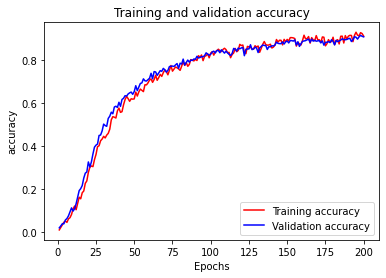

In [4]:
printplt(training_history)

In [5]:
test_dir = 'D:\\aligned_images_DB_dataset\\test'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        directory = test_dir,
        target_size=(152, 152),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

model.evaluate(test_generator)

Found 31270 images belonging to 1595 classes.
978/978 [==============================] - 1015s 1s/step - loss: 1.2582 - acc: 0.8460


[1.2581865787506104, 0.8460185527801514]

In [6]:
model.save('D:\\saved_model\\DF_200.h5')

In [16]:
training_history.history

{'loss': [15.901619911193848,
  13.268969535827637,
  12.940574645996094,
  12.724366188049316,
  12.310381889343262,
  12.393536567687988,
  12.335624694824219,
  11.607147216796875,
  11.768202781677246,
  11.279566764831543,
  11.240436553955078,
  11.427748680114746,
  10.451411247253418,
  10.236285209655762,
  10.097569465637207,
  10.083492279052734,
  9.871195793151855,
  9.336426734924316,
  9.229304313659668,
  9.128613471984863,
  9.23123836517334,
  9.051065444946289,
  8.5697660446167,
  7.984318733215332,
  8.208353042602539,
  7.586956024169922,
  7.49091911315918,
  7.5271172523498535,
  7.501169204711914,
  7.1305670738220215,
  6.870749473571777,
  7.095653533935547,
  6.668389320373535,
  6.323411464691162,
  6.19749641418457,
  5.950539588928223,
  5.2806267738342285,
  6.137842178344727,
  5.388761520385742,
  5.120344638824463,
  5.593967437744141,
  5.006410598754883,
  5.143662929534912,
  4.624812602996826,
  4.5728230476379395,
  4.851795196533203,
  4.8264741

In [17]:
import statistics
print(statistics.mean(training_history.history['acc']), max(training_history.history['acc']), 
     statistics.mean(training_history.history['val_acc']), max(training_history.history['val_acc']))

0.7126875004172325 0.9293749928474426 0.7210596082173288 0.9146446585655212
